In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Conv1D,Conv2D,Flatten,BatchNormalization,MaxPooling1D,Dropout,Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D
from tensorflow.keras.layers import Activation,Add,Reshape,Permute,LeakyReLU,UpSampling2D,Conv2DTranspose,Concatenate
from tensorflow.keras.layers import Lambda,InputSpec,Layer,Input,Add,ZeroPadding2D,UpSampling2D,MaxPooling2D,Conv2D,Bidirectional,LSTM
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam,SGD
import datetime
from tensorflow.keras.utils import plot_model
import os
import json


# def load_dataset():

# ddata1 = pd.read_pickle('./test/benign_test.pkl')
# ddata2 = pd.read_pickle('./test/Password_attack.pkl')
# ddata3 = pd.read_pickle('./test/DDOS.pkl')
# ddata = pd.concat([ddata1,ddata2,ddata3],axis=0)
# ddata = pd.read_pickle('./test/DDOS.pkl')
# ddata = pd.read_pickle('./data/data/port_scan_all_2_1M.pkl')
ddata = pd.read_csv('./test.csv')
# ddata = pd.read_pickle('./data/')
# print(ddata.shape)
# print(ddata.columns)

In [2]:
print(ddata.shape)

(4971, 80)


In [3]:

def preprocessing_predict(ddata):
        namere = {
                'ack_flag_cnt':'ACK Flag Cnt',
                'active_max' :'Active Max',
                'active_mean' :'Active Mean',
                'active_min' :'Active Min',
                'active_std' :'Active Std',
                'bwd_blk_rate_avg' :'Bwd Blk Rate Avg',
                'bwd_byts_b_avg' :'Bwd Byts/b Avg',
                'bwd_header_len': 'Bwd Header Len',
                'bwd_iat_max' :'Bwd IAT Max',
                'bwd_iat_mean' :'Bwd IAT Mean',
                'bwd_iat_min' :'Bwd IAT Min',
                'bwd_iat_std' :'Bwd IAT Std',
                'bwd_iat_tot' :'Bwd IAT Tot',
                'bwd_pkt_len_max' :'Bwd Pkt Len Max',
                'bwd_pkt_len_mean' :'Bwd Pkt Len Mean',
                'bwd_pkt_len_min' :'Bwd Pkt Len Min',
                'bwd_pkt_len_std' :'Bwd Pkt Len Std',
                'bwd_pkts_b_avg' :'Bwd Pkts/b Avg',
                'bwd_pkts_s' :'Bwd Pkts/s',
                'bwd_psh_flags' :'Bwd PSH Flags',#Bwd PSH Flags
                'bwd_seg_size_avg' :'Bwd Seg Size Avg',
                'bwd_urg_flags' :'Bwd URG Flags',
                'cwe_flag_count' :'CWE Flag Count',
                'down_up_ratio' :'Down/Up Ratio',
                'dst_port' :'Dst Port',
                'ece_flag_cnt':'ECE Flag Cnt',
                'fin_flag_cnt':'FIN Flag Cnt',
                'flow_byts_s' :'Flow Byts/s',
                'flow_duration' :'Flow Duration',
                'flow_iat_max' :'Flow IAT Max',
                'flow_iat_mean' :'Flow IAT Mean',
                'flow_iat_min' :'Flow IAT Min',
                'flow_iat_std' :'Flow IAT Std',
                'flow_pkts_s' :'Flow Pkts/s',
                'fwd_act_data_pkts' :'Fwd Act Data Pkts',
                'fwd_blk_rate_avg' :'Fwd Blk Rate Avg',
                'fwd_byts_b_avg' :'Fwd Byts/b Avg',
                'fwd_header_len' :'Fwd Header Len',
                'fwd_iat_max' :'Fwd IAT Max',
                'fwd_iat_mean' :'Fwd IAT Mean',
                'fwd_iat_min' :'Fwd IAT Min',
                'fwd_iat_std' :'Fwd IAT Std',
                'fwd_iat_tot' :'Fwd IAT Tot',
                'fwd_pkt_len_max' :'Fwd Pkt Len Max',
                'fwd_pkt_len_mean' :'Fwd Pkt Len Mean',
                'fwd_pkt_len_min' :'Fwd Pkt Len Min',
                'fwd_pkt_len_std' :'Fwd Pkt Len Std',
                'fwd_pkts_b_avg' :'Fwd Pkts/b Avg',
                'fwd_pkts_s' :'Fwd Pkts/s',
                'fwd_psh_flags' :'Fwd PSH Flags', #
                'fwd_seg_size_avg' :'Fwd Seg Size Avg',
                'fwd_seg_size_min' :'Fwd Seg Size Min',
                'fwd_urg_flags' :'Fwd URG Flags',
                'idle_max' :'Idle Max',
                'idle_mean' :'Idle Mean',
                'idle_min' :'Idle Min',
                'idle_std' :'Idle Std',
                'init_bwd_win_byts' :'Init Bwd Win Byts',
                'init_fwd_win_byts' :'Init Fwd Win Byts',
                'pkt_len_max' :'Pkt Len Max',
                'pkt_len_mean' :'Pkt Len Mean',
                'pkt_len_min' :'Pkt Len Min',
                'pkt_len_std' :'Pkt Len Std',
                'pkt_len_var' :'Pkt Len Var',
                'pkt_size_avg' :'Pkt Size Avg',
                'protocol' :'Protocol',
                'psh_flag_cnt' :'PSH Flag Cnt',#
                'rst_flag_cnt' :'RST Flag Cnt',
                'subflow_bwd_byts' :'Subflow Bwd Byts',
                'subflow_bwd_pkts' :'Subflow Bwd Pkts',
                'subflow_fwd_byts' :'Subflow Fwd Byts',
                'subflow_fwd_pkts' :'Subflow Fwd Pkts',
                'syn_flag_cnt' :'SYN Flag Cnt',#
                'timestamp' :'Timestamp',
                'tot_bwd_pkts' :'Tot Bwd Pkts',
                'tot_fwd_pkts' :'Tot Fwd Pkts',
                'totlen_bwd_pkts' :'TotLen Bwd Pkts',
                'totlen_fwd_pkts' :'TotLen Fwd Pkts',
                'urg_flag_cnt' :'URG Flag Cnt'
        }
        ddata = ddata.rename(columns=namere)
        # ddata.drop(['Timestamp','Label'],axis=1,inplace=True)
        df = ddata
        df_ip = df[['src_ip', 'dst_ip']]
        # Remove missing values
        df.dropna(axis=0, inplace=True, how="any")
        # Replace infinite values to NaN
        df.replace([-np.inf, np.inf], np.nan, inplace=True)

        # Remove infinte values
        df.dropna(axis=0, how='any', inplace=True)

        # drop columns 
        colu= ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg']
        df.drop(colu,axis=1,inplace=True)
        # convert to numeric
        df[['Flow Byts/s', 'Flow Pkts/s']] = df[['Flow Byts/s', 'Flow Pkts/s']].apply(pd.to_numeric)
        # drop columns 
        colu = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd Header Len', 'Pkt Len Mean', 'Bwd Byts/b Avg', 'Subflow Bwd Pkts', 'Idle Mean', 'Idle Max']
        df.drop(colu,axis=1,inplace=True)
        df_ip = df[['src_ip', 'dst_ip']]
        from pickle import load
        scaler = load(open('./normalization/preprocessor_v2_update_port_scan_2023-03-04-18-33-04.pkl', 'rb'))
        # normalization
        numeric_features = ['Dst Port', 'Protocol', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
        'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
        'Bwd Pkt Len Std', 'Flow Byts/s', 'Fwd IAT Tot', 'Fwd IAT Mean',
        'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
        'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
        'Fwd PSH Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
        'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Std', 'Pkt Len Var',
        'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
        'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio',
        'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
        'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
        'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
        'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
        'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std',
        'Idle Min']
        df = pd.DataFrame(scaler.transform(df), columns=numeric_features)
        # print(df.columns)
        df = df.to_numpy().reshape(df.shape[0],df.shape[1],1)
        # 1. load model
        print(df.shape)
        model = load_model('./models/2023-03-04-18-33-04/model_2023-03-04-18-33-04.h5')
        # 2. predict
        y_pred = model.predict([df,df,df])
        y_pred = np.argmax(y_pred, axis=1)
        y_pred = pd.DataFrame(y_pred, columns=['label'])
        y_pred['label'].value_counts()
        y_pred['label'].value_counts().plot(kind='bar')
        ans = pd.concat([df_ip, y_pred], axis=1)
        return ans

def preprocessing_predict1(ddata):
        ddata.drop(['Timestamp'],axis=1,inplace=True)  
        # ddata.drop(['Label'],axis=1,inplace=True)
        df = ddata
        # Remove missing values
        df.dropna(axis=0, inplace=True, how="any")
        # Replace infinite values to NaN
        df.replace([-np.inf, np.inf], np.nan, inplace=True)

        # Remove infinte values
        df.dropna(axis=0, how='any', inplace=True)

        # drop columns 
        colu= ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg']
        df.drop(colu,axis=1,inplace=True)
        # convert to numeric
        df[['Flow Byts/s', 'Flow Pkts/s']] = df[['Flow Byts/s', 'Flow Pkts/s']].apply(pd.to_numeric)
        # drop columns 
        colu = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd Header Len', 'Pkt Len Mean', 'Bwd Byts/b Avg', 'Subflow Bwd Pkts', 'Idle Mean', 'Idle Max']
        df.drop(colu,axis=1,inplace=True)
        
        df['Label'].replace(['Benign'], 0, inplace=True)
        df['Label'].replace(['Port_scan'], 3, inplace=True)
        df['Label'].replace(['DDOS'], 1, inplace=True)
        df['Label'].replace(['Password_attack'], 2, inplace=True)
        y = df['Label']
        df = df.drop(['Label'],axis=1)

        from pickle import load
        scaler = load(open('./normalization/preprocessor_v2_update_port_scan_2023-03-04-18-33-04.pkl', 'rb'))
        # normalization
        numeric_features = ['Dst Port', 'Protocol', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
        'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
        'Bwd Pkt Len Std', 'Flow Byts/s', 'Fwd IAT Tot', 'Fwd IAT Mean',
        'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
        'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
        'Fwd PSH Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
        'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Std', 'Pkt Len Var',
        'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
        'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio',
        'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
        'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
        'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
        'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
        'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std',
        'Idle Min']
        df = pd.DataFrame(scaler.transform(df), columns=numeric_features)
        df = df.to_numpy().reshape(df.shape[0],df.shape[1],1)
        # 1. load model
        model = load_model('./models/2023-03-04-18-33-04/model_2023-03-04-18-33-04.h5')
        # 2. predict
        y_pred = model.predict([df,df,df],batch_size=512)
        y_pred = np.argmax(y_pred, axis=1)
        y_pred = pd.DataFrame(y_pred, columns=['label'])
        y_pred['label'].value_counts()
        y_pred['label'].value_counts().plot(kind='bar')

        return y_pred,y


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator QuantileTransformer from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator QuantileTransformer from version 1.2.1 when using version 1.2.2. This m

10/10 [==============================] - 0s 12ms/step


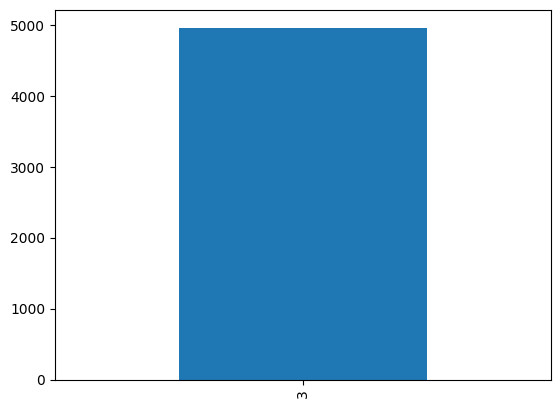

In [4]:
y_pred,y = preprocessing_predict1(ddata)

In [5]:
print(y_pred)
# DDOS = 1 [1930824 rows x 1 columns] 0.9991759994696565
# Password_attack = 2 [347034 rows x 1 columns] 1.0
# Benign = 0 [0 rows x 1 columns] 1.0

      label
0         3
1         3
2         3
3         3
4         3
...     ...
4966      3
4967      3
4968      3
4969      3
4970      3

[4971 rows x 1 columns]


In [6]:
yhat_= np.full(y_pred.shape, 1)
# print(y)

In [7]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4966    1
4967    1
4968    1
4969    1
4970    1
Name: Label, Length: 4971, dtype: int64


In [8]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# print(accuracy_score(y_pred,y))
# print(confusion_matrix(y_pred,y))

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 
import tensorflow as tf

In [1]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')


In [2]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')


In [3]:
tf.config.list_physical_devices('GPU')

[]